<a href="https://colab.research.google.com/github/shuklasid19/tensorflow-2.0/blob/main/00_linreg1_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#import required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [83]:
insurance = pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')


In [84]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [85]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [87]:
insurance_one_hot = pd.get_dummies(insurance)

In [88]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


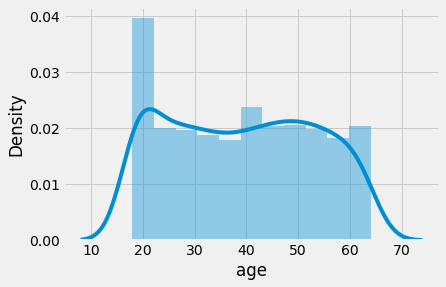

In [89]:
plt.style.use('fivethirtyeight')
sns.distplot(insurance['age'])

In [90]:
#create x and y values (features and labels)
x = insurance_one_hot.drop('charges', axis=1,)
y = insurance_one_hot['charges']

In [91]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [92]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [93]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


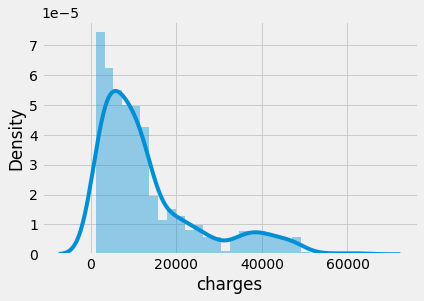

In [94]:
sns.distplot(insurance_one_hot['charges'])

In [95]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x, y, test_size=0.33,
                                                      random_state=101)

In [96]:
x_train.shape

(896, 11)

In [97]:
x_test.shape

(442, 11)

In [98]:
y_train.shape

(896,)

In [99]:
y_test.shape

(442,)

In [100]:
import tensorflow as tf

In [101]:
tf.random.set_seed(101)

#create  a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics= ['mae'])

#3. Fit the model
insurance_model.fit(x_train,  y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 8921.7305 - mae: 8921.7305
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 7910.1748 - mae: 7910.1748
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 7947.2070 - mae: 7947.2070
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 7679.7432 - mae: 7679.7432
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 7935.6724 - mae: 7935.6724
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 7831.5317 - mae: 7831.5317
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 7708.1284 - mae: 7708.1284
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 7721.9780 - mae: 7721.9780
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 7990.2451 - mae: 7990.2451
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 7919.1362 - mae: 7919.1362

In [102]:
insurance_model.evaluate(x_test, y_test)


14/14 [==============================] - 0s 1ms/step - loss: 7180.3271 - mae: 7180.3271


[7180.3271484375, 7180.3271484375]

In [103]:
y_train.median()

9473.977725

In [104]:
y_train.mean()

13560.118576025663

In [105]:
#set random seed
tf.random.set_seed(101)

#1. create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#training
insurance_model.fit(x_train,  y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 7382.1602 - mae: 7382.1602
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 7362.6455 - mae: 7362.6455
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 7630.5308 - mae: 7630.5308
Epoch 4/100
28/28 [==============================] - 0s 1000us/step - loss: 7243.7593 - mae: 7243.7593
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 7396.6807 - mae: 7396.6807
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 7515.2490 - mae: 7515.2490
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 7195.9268 - mae: 7195.9268
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 7166.5811 - mae: 7166.5811
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 7479.1914 - mae: 7479.1914
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 7530.1138 - mae: 7530.1

In [106]:
insurance_model_2.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 12672.4170 - mae: 12672.4170


[12672.4169921875, 12672.4169921875]

In [108]:
tf.random.set_seed(101)

insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)

])

insurance_model_3.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#3. fit the model
history = insurance_model_3.fit(x_train, y_train , epochs=200)



Epoch 1/200
28/28 [==============================] - 0s 2ms/step - loss: 13509.3662 - mae: 13509.3662
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 13398.5146 - mae: 13398.5146
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 13197.1338 - mae: 13197.1338
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 12830.7490 - mae: 12830.7490
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 12206.1777 - mae: 12206.1777
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 11270.1025 - mae: 11270.1025
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 10106.2969 - mae: 10106.2969
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 8961.2891 - mae: 8961.2891
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 8153.4067 - mae: 8153.4067
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 7863.4351 - 

In [109]:
insurance_model_3.evaluate(x_train, y_train)

28/28 [==============================] - 0s 1ms/step - loss: 3880.2402 - mae: 3880.2402


[3880.240234375, 3880.240234375]

In [112]:
insurance_model_3.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 3429.4167 - mae: 3429.4167


[3429.416748046875, 3429.416748046875]

In [111]:
y_train.mean()

13560.118576025663

Text(0.5, 0, 'epochs')

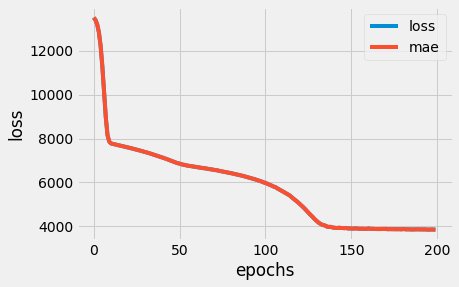

In [113]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [116]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                            patience=10)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
]
)

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])



In [117]:
model_4.fit(x_train, y_train  , epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 13491.5986 - mae: 13491.5986
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 13351.1943 - mae: 13351.1943
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 13104.2236 - mae: 13104.2236
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 12668.9443 - mae: 12668.9443
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 11954.7129 - mae: 11954.7129
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 10931.9795 - mae: 10931.9795
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 9736.7686 - mae: 9736.7686
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 8651.1465 - mae: 8651.1465
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 7995.5166 - mae: 7995.5166
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 7797.1519 - ma

In [118]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


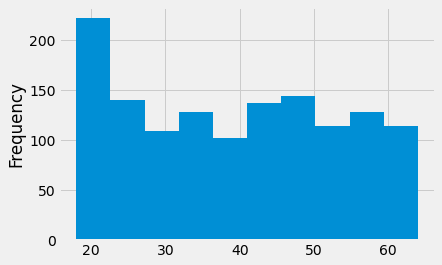

In [119]:
x['age'].plot(kind='hist')

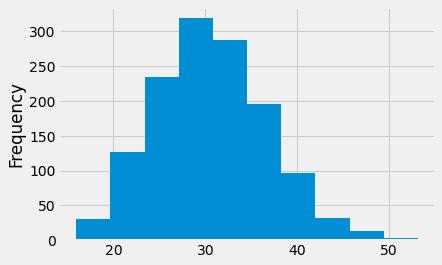

In [120]:
x['bmi'].plot(kind='hist')

In [121]:
df = pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')

In [122]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder



In [130]:
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler() , ['age', 'bmi', 'children']),
     (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
    ,)

In [131]:
#create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [132]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42)

#fit the column transformer to our training data
ct.fit(x_train)

#transform training and test data with normalization (MinMaxscaler) and onehotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

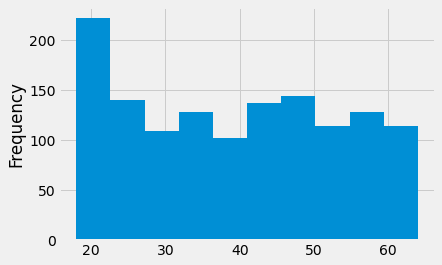

In [133]:
x['age'].plot(kind='hist')

In [134]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object



1.   List item
2.   List item



In [136]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [139]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_5.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [141]:
model_5.evaluate(x_train_normal , y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3632.0366 - mae: 3632.0366


[3632.03662109375, 3632.03662109375]

In [143]:
model_5.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]